In [1]:
# General imports
import pandas as pd
import matplotlib as plt
from IPython.display import Markdown, display

In [2]:
# For display
%matplotlib
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

plt.style.use('ggplot')

def printmd(string):
    display(Markdown(string))

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


c:\users\yurih\appdata\local\programs\python\python36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
# Load data
event_log_file = './data/event_log.csv'
df = pd.read_csv(event_log_file)
df.head()

,id,timestamp,email_id,action
0,4591b11ba8cca67079c1a43be2992a8f89fce422,2018-05-25 14:59:02 UTC,3498910,open
1,2bbdb4cff0fe8cc3cb6c1757291e31806ecefa47,2018-06-25 17:47:23 UTC,3498910,open
2,0f467135eabd4e385f9c2dcd3f00a9f2a04c0115,2018-06-27 12:32:36 UTC,3498910,open
3,6f17b7dc6f220c09fba4d8fbc2491317eece2ae8,2018-07-02 22:47:28 UTC,3498910,open
4,a645dd2ac5c5e000c8b5c7739b3a54435fb313cc,2018-01-24 19:21:49 UTC,3498910,open


In [4]:
list(df.action.unique())

['open', 'click', 'received', 'spamreport', 'unsubscribe']

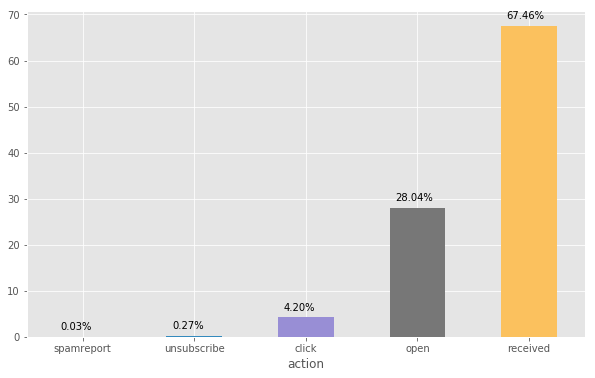

In [28]:
df_count = df.groupby(['action',]).action.count().map(lambda x: x/len(df.index)*100)
df_count = df_count.rename('percent').sort_values()
ax = df_count.plot.bar(rot=0)
for i, v in enumerate(df_count):
    ax.text(i -.20, v + 1.5, '{:.2f}%'.format(v), color='k')

# savefig('./saved_graphs/action_percentage.png')

In [6]:
# Check datatype
ar = df.timestamp.map(lambda x: x.endswith('UTC')).unique()
assert len(ar) == True

In [7]:
printmd('Number of individual ids: **{}**'.format(len(df.id.unique())))

Number of individual ids: **24024**

In [8]:
# Interest per id
labels = { 'interested': ['open', 'click'], 'not_interested': ['received', 'spamreport', 'unsubscribe'] }
category_label = dict()
for k,values in labels.items():
    for v in values:
        category_label[v] = k
df['status'] = df.action.map(lambda x: category_label[x])
df_is = df.groupby(['id','status']).status.count().unstack().fillna(0)
df_is['i_perc'] = df_is.interested/(df_is.interested + df_is.not_interested)*100
df_is['ni_perc'] = df_is.not_interested/(df_is.interested + df_is.not_interested)*100
df_is.head()

status,interested,not_interested,i_perc,ni_perc
id,,,,
00009d30d2f6cdca3b306b6a0fe58a32e51dabdc,3.0,16.0,15.789474,84.210526
000381bbcff473fa34421bf98aecd7598f547212,0.0,3.0,0.000000,100.000000
00074efe132b0b36c90ef600386ca2f863bc5e49,2.0,18.0,10.000000,90.000000
0009b0b413429e75bf81c8989d7c6201f2d86180,11.0,16.0,40.740741,59.259259
000c8d54dcdee43b7f76073ef2a83503402bc5a3,2.0,15.0,11.764706,88.235294


In [30]:
# Avg of interest
i_mean = df_is.i_perc.mean()
i_median = df_is.i_perc.median()
ni_mean = df_is.ni_perc.mean()
ni_median = df_is.ni_perc.median()

md_msg = '**[{}]** Average: **{:.2f}%** - Median: **{:.2f}%**'
printmd(md_msg.format('Interest', i_mean, i_median))
printmd(md_msg.format('Disinterest', ni_mean, ni_median))

**[Interest]** Average: **21.11%** - Median: **12.50%**

**[Disinterest]** Average: **78.89%** - Median: **87.50%**

<Figure size 720x432 with 0 Axes>

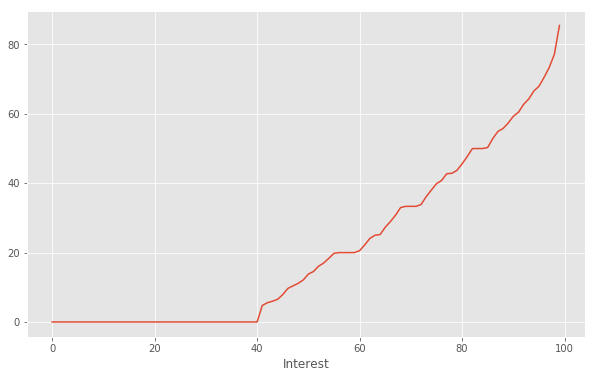

In [29]:
# Interest scale
df_is_1 = df_is.i_perc.sort_values().reset_index()
df_is_1['Interest'] = (df_is_1.index.to_series() / ((len(df_is_1.index))/100)).astype(int)
interest_ax = df_is_1.groupby(['Interest']).i_perc.mean().plot()
# savefig('./saved_graphs/interest_scale.png')

In [11]:
completely_disinterested = len(df_is[(df_is.interested == 0)])
cd_percent = completely_disinterested/len(df_is)*100
assert cd_percent > 40
printmd('As visible in the chart above more than **40%** of people didn\'t opened one single email.')

As visible in the chart above more than **40%** of people didn't opened one single email.

In [12]:
# Interest per day of the week
df['timestamp_dt'] = pd.to_datetime(df.timestamp)
df['week_day'] = df.timestamp_dt.dt.weekday_name # or day_name() pandas v0.23+
df.week_day = pd.Categorical(df.week_day, 
     categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], 
     ordered=True
)

df_iw = df.groupby(['week_day', 'status']).status.count().unstack().fillna(0)
df_iw['i_perc'] = df_iw.interested/(df_iw.interested + df_iw.not_interested)*100
df_iw.head()

status,interested,not_interested,i_perc
week_day,,,
Monday,15233,49373,23.578305
Tuesday,29702,68641,30.202455
Wednesday,16774,28602,36.966678
Thursday,21709,46873,31.654078
Friday,12432,19044,39.496759


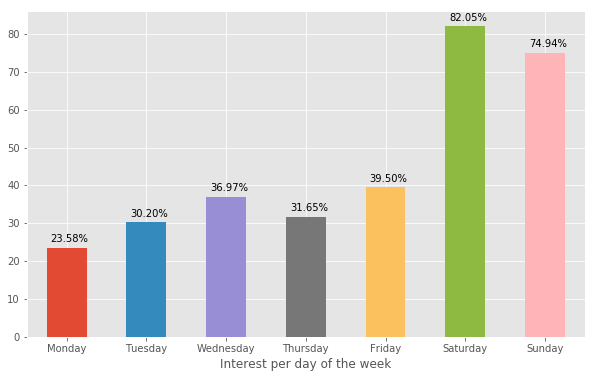

In [31]:
df_iw_s = df_iw.i_perc
df_iw_s.index.names = ['Interest per day of the week',]
ax = df_iw_s.plot.bar(rot=0)
for i, v in enumerate(df_iw_s):
    ax.text(i -.20, v + 1.5, '{:.2f}%'.format(v), color='k')
# savefig('./saved_graphs/interest_per_day_week.png')

In [26]:
df_it = df.groupby([
        pd.Grouper(key='timestamp_dt', freq='M'), 
        'status',
    ]).status.count().unstack().fillna(0)

df_it['i_perc'] = df_it.interested/(df_it.interested + df_it.not_interested)*100
df_it.head()

status,interested,not_interested,i_perc
timestamp_dt,,,
2018-01-31,2307,6139,27.314705
2018-02-28,3078,7177,30.014627
2018-03-31,2142,4952,30.194531
2018-04-30,6007,11719,33.888074
2018-05-31,11149,19481,36.398955


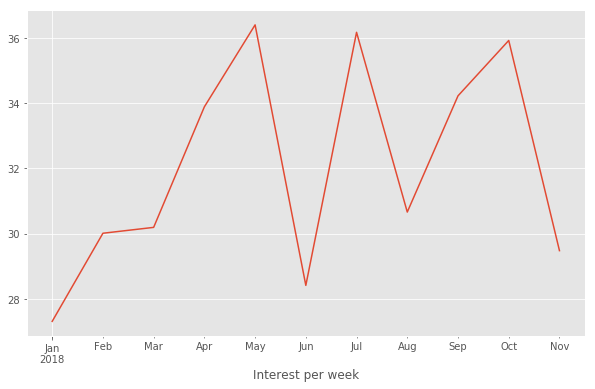

In [32]:
df_it_s = df_it.i_perc
df_it_s.index.names = ['Interest per week',]
ax = df_it_s.plot()
# savefig('./saved_graphs/interest_per_week.png')